# t-SNE 

Using t-SNE for the dimensionality reduction in the big combined data.

In [73]:
# Import necessary libraries 
import os
import pandas as pd
from pathlib import Path
from functools import reduce

# Visulisation 
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning 
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [89]:
# Read the data 
data = pd.read_csv('../corona_data_sets_modified/df_final.csv')
data.shape

(401, 169)

In [90]:
data.head()

,ags5,ags2,kreis,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,average_distance_train_station,average_distance_public_transport,Unnamed:_0,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
0,1001,1,"Flensburg, Stadt",92,500,35,240,2901,240,0,...,2986,34496,19556,16.0,13209,12385,13092,5441,3096,3497
1,1002,1,"Kiel, Landeshauptstadt",92,460,37,268,2037,265,1,...,3304,35246,19612,12.1,22126,38523,39483,18567,11162,7841
2,1003,1,"Lübeck, Hansestadt",90,532,37,297,1927,294,2,...,3036,37219,20820,15.1,22881,30159,32571,15805,10999,9039
3,1004,1,"Neumünster, Stadt",85,588,37,316,1648,313,3,...,2842,38141,19561,17.9,7208,13291,10435,3812,3201,2805
4,10041,10,Regionalverband Saarbrücken,76,734,52,260,1804,255,318,...,3431,37046,19917,14.4,31031,44117,53073,24122,13716,11119


In [91]:
# Subset data for the input to TSNE 
data_to_fit = data.drop(['kreis', 'ags5', 'ags2'], axis=1)
data_to_fit.shape

(401, 166)

In [92]:
scaler = StandardScaler()
scaler.fit(data_to_fit)
scaled_data = scaler.transform(data_to_fit)
scaled_data

array([[ 1.43785315, -1.2448949 , -0.4875041 , ..., -0.50319801,
        -0.46613594, -0.4561535 ],
       [ 1.43785315, -1.32295755, -0.30446183, ...,  0.07085952,
        -0.09400719, -0.28489549],
       [ 1.31128546, -1.18244477, -0.30446183, ..., -0.04993485,
        -0.10152727, -0.23766549],
       ...,
       [-0.71379758,  0.45101622, -0.76206751, ..., -0.18406821,
        -0.11333795,  0.02761885],
       [-1.1567845 ,  1.22383647, -0.67054638, ..., -0.1922028 ,
        -0.16450219, -0.15570292],
       [-0.33409451,  0.10558898, -0.39598297, ..., -0.23125761,
        -0.07822885,  0.1136421 ]])

### t-sne parameters 

* low learning rates- conservatives estimates

In [93]:
# Create a tsne instance 
tsne = TSNE(learning_rate=50, 
            n_components=3, 
            verbose=2, 
            random_state=42)   

In [94]:
# Fit the model  
tsne_features = tsne.fit_transform(data_to_fit)

# Convert to df
tsne_features = pd.DataFrame(tsne_features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 401 samples in 0.000s...
[t-SNE] Computed neighbors for 401 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 401 / 401
[t-SNE] Mean sigma: 29187.141278
[t-SNE] Computed conditional probabilities in 0.078s
[t-SNE] Iteration 50: error = 55.2285156, gradient norm = 0.2276336 (50 iterations in 0.118s)
[t-SNE] Iteration 100: error = 51.8938293, gradient norm = 0.0625881 (50 iterations in 0.091s)
[t-SNE] Iteration 150: error = 51.7733879, gradient norm = 0.0111690 (50 iterations in 0.074s)
[t-SNE] Iteration 200: error = 51.7584953, gradient norm = 0.0017002 (50 iterations in 0.085s)
[t-SNE] Iteration 250: error = 51.7593880, gradient norm = 0.0020292 (50 iterations in 0.077s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.759388
[t-SNE] Iteration 300: error = 0.3350427, gradient norm = 0.0013349 (50 iterations in 0.099s)
[t-SNE] Iteration 350: error = 0.2717592, gradient norm = 0.00019

In [95]:
tsne_features

,0,1,2
0,1.451321,0.997795,-8.802542
1,0.571999,-0.630382,3.653906
2,2.931996,-0.410092,11.033397
3,-5.350160,-0.444597,-11.441248
4,-2.074410,0.615316,2.795167
...,...,...,...
396,3.630510,-1.521389,11.951746
397,3.141432,0.150267,15.602412
398,3.697591,-2.848331,5.461304
399,-0.474779,0.778231,-5.709379


### Identify the most important features

This is doesn't work well with t-sne because it does not return the pca shape embededdings.

In [9]:
# # Get the embeddings for each variable
# tsne_params = pd.DataFrame(tsne.embedding_, 
#                            columns=data_to_fit.columns, 
#                            index=['feature1', 'feature2', 'feature3'])
# # Transpose the params
# tsne_params = tsne_params.T 

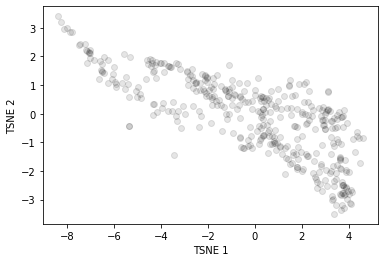

In [10]:
plt.scatter(tsne_features[0], tsne_features[1], alpha=.1, color='black')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.show()

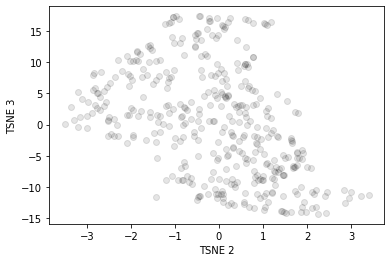

In [11]:
plt.scatter(tsne_features[1], tsne_features[2], alpha=.1, color='black')
plt.xlabel('TSNE 2')
plt.ylabel('TSNE 3')
plt.show()

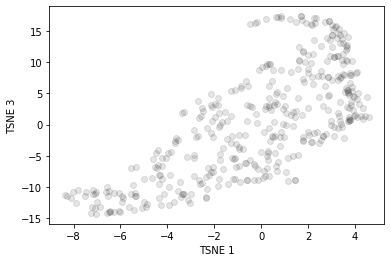

In [12]:
plt.scatter(tsne_features[0], tsne_features[2], alpha=.1, color='black')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 3')
plt.show()

## k-means Clustering

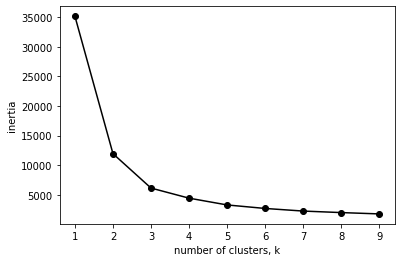

In [96]:
k_values = range(1, 10)
inertias = []

for k in k_values:
    
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(tsne_features.iloc[:, :3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot the values
plt.plot(k_values, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(k_values)
plt.show()

In [97]:
# Picked three based on the above values
km = KMeans(n_clusters=2).fit(data_to_fit)

# Create a cluster map dataframe
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = km.labels_

data = cluster_map.merge(data, left_on='data_index', right_index=True)

In [98]:
data.head()

,data_index,cluster,ags5,ags2,kreis,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,average_distance_train_station,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
0,0,0,1001,1,"Flensburg, Stadt",92,500,35,240,2901,...,2986,34496,19556,16.0,13209,12385,13092,5441,3096,3497
1,1,0,1002,1,"Kiel, Landeshauptstadt",92,460,37,268,2037,...,3304,35246,19612,12.1,22126,38523,39483,18567,11162,7841
2,2,0,1003,1,"Lübeck, Hansestadt",90,532,37,297,1927,...,3036,37219,20820,15.1,22881,30159,32571,15805,10999,9039
3,3,0,1004,1,"Neumünster, Stadt",85,588,37,316,1648,...,2842,38141,19561,17.9,7208,13291,10435,3812,3201,2805
4,4,0,10041,10,Regionalverband Saarbrücken,76,734,52,260,1804,...,3431,37046,19917,14.4,31031,44117,53073,24122,13716,11119


### Evaluate Clusters

In [99]:
# Check the cluster kreis 
cluster1 = data[data['cluster'] == 0]
print("Number of counties:", cluster1.shape[0])
list(cluster1['kreis'])

Number of counties: 397


['Flensburg, Stadt',
 'Kiel, Landeshauptstadt',
 'Lübeck, Hansestadt',
 'Neumünster, Stadt',
 'Regionalverband Saarbrücken',
 'Landkreis Merzig-Wadern',
 'Landkreis Neunkirchen',
 'Landkreis Saarlouis',
 'Saarpfalz-Kreis',
 'Landkreis St. Wendel',
 'Dithmarschen',
 'Herzogtum Lauenburg',
 'Nordfriesland',
 'Ostholstein',
 'Pinneberg',
 'Plön',
 'Rendsburg-Eckernförde',
 'Schleswig-Flensburg',
 'Segeberg',
 'Steinburg',
 'Stormarn',
 'Brandenburg an der Havel',
 'Cottbus',
 'Frankfurt (Oder)',
 'Potsdam',
 'Barnim',
 'Dahme-Spreewald',
 'Elbe-Elster',
 'Havelland',
 'Märkisch-Oderland',
 'Oberhavel',
 'Oberspreewald-Lausitz',
 'Oder-Spree',
 'Ostprignitz-Ruppin',
 'Potsdam-Mittelmark',
 'Prignitz',
 'Spree-Neiße',
 'Teltow-Fläming',
 'Uckermark',
 'Rostock, Hansestadt',
 'Schwerin, Landeshauptstadt',
 'Mecklenburgische Seenplatte',
 'Landkreis Rostock',
 'Vorpommern-Rügen',
 'Nordwestmecklenburg',
 'Vorpommern-Greifswald',
 'Ludwigslust-Parchim',
 'Chemnitz',
 'Erzgebirgskreis',
 'Mitte

In [100]:
# Check the cluster 2 kreis 
cluster2 = data[data['cluster'] == 1]
print("Number of counties:", cluster2.shape[0])
list(cluster2['kreis'])

Number of counties: 4


['Berlin', 'Hamburg', 'Kreisfreie Stadt Frankfurt am Main', 'München']

In [63]:
# Check the cluster kreis 
cluster3 = data[data['cluster'] == 2]
print("Number of counties:", cluster3.shape[0])
list(cluster3['kreis'])

Number of counties: 24


['Nordfriesland',
 'Ostholstein',
 'Mecklenburgische Seenplatte',
 'Landkreis Rostock',
 'Vorpommern-Rügen',
 'Vorpommern-Greifswald',
 'Dresden',
 'Leipzig',
 'Hannover',
 'Aurich',
 'Düsseldorf',
 'Köln',
 'Hochsauerlandkreis',
 'Kreisfreie Stadt Frankfurt am Main',
 'Waldeck-Frankenberg',
 'Stuttgart',
 'Breisgau-Hochschwarzwald',
 'Ortenaukreis',
 'Bodenseekreis',
 'Garmisch-Partenkirchen',
 'Passau',
 'Nürnberg',
 'Ostallgäu',
 'Oberallgäu']

### Removing the three big cities

In [67]:
# Get cluster ags 
idx = cluster2['ags5'].to_list()
idx

[11000, 2000, 9162]

In [71]:
# Remove this from the data 
data_no_berlin = data[~data['ags5'].isin(idx)]
data_no_berlin

,data_index,cluster,ags5,ags2,kreis,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,average_distance_train_station,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
0,0,0,1001,1,"Flensburg, Stadt",92,500,35,240,2901,...,2986,34496,19556,16.0,13209,12385,13092,5441,3096,3497
1,1,0,1002,1,"Kiel, Landeshauptstadt",92,460,37,268,2037,...,3304,35246,19612,12.1,22126,38523,39483,18567,11162,7841
2,2,0,1003,1,"Lübeck, Hansestadt",90,532,37,297,1927,...,3036,37219,20820,15.1,22881,30159,32571,15805,10999,9039
3,3,0,1004,1,"Neumünster, Stadt",85,588,37,316,1648,...,2842,38141,19561,17.9,7208,13291,10435,3812,3201,2805
4,4,0,10041,10,Regionalverband Saarbrücken,76,734,52,260,1804,...,3431,37046,19917,14.4,31031,44117,53073,24122,13716,11119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,396,0,9776,9,Lindau (Bodensee),63,1056,36,461,3039,...,3334,53011,27281,7.6,1899,4382,10928,7859,6828,10105
397,397,2,9777,9,Ostallgäu,59,1418,33,907,3726,...,3231,52358,25107,6.3,4076,8392,16455,11687,10814,15803
398,398,0,9778,9,Unterallgäu,58,1369,32,855,4129,...,3297,60441,27461,6.1,4051,6995,15103,12738,10743,15768
399,399,0,9779,9,Donau-Ries,51,1765,33,788,3800,...,3368,57645,25919,5.6,2530,7245,16893,12552,9634,11118


In [75]:
# Subset data for the input to TSNE 
data_to_fit = data_no_berlin.drop(['kreis', 'ags5', 'ags2'], axis=1)
data_to_fit.shape

scaler = StandardScaler()
scaler.fit(data_to_fit)
scaled_data = scaler.transform(data_to_fit)
scaled_data

array([[-1.73374041, -0.2533202 ,  1.46220732, ..., -0.79579225,
        -0.84061225, -0.73352279],
       [-1.72509072, -0.2533202 ,  1.46220732, ...,  0.25102979,
        -0.04794147, -0.40495553],
       [-1.71644104, -0.2533202 ,  1.33465477, ...,  0.03075534,
        -0.06395998, -0.31434237],
       ...,
       [ 1.70883453, -0.2533202 , -0.70618605, ..., -0.21384341,
        -0.08911789,  0.19461921],
       [ 1.71748422, -0.2533202 , -1.15261997, ..., -0.22867725,
        -0.19810276, -0.15709298],
       [ 1.7261339 ,  3.94757309, -0.32352839, ..., -0.2998956 ,
        -0.01433207,  0.35965921]])

In [76]:
# Fit the model  
tsne_features = tsne.fit_transform(data_to_fit)

# Convert to df
tsne_features = pd.DataFrame(tsne_features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 398 samples in 0.001s...
[t-SNE] Computed neighbors for 398 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 398 / 398
[t-SNE] Mean sigma: 29078.165554
[t-SNE] Computed conditional probabilities in 0.070s
[t-SNE] Iteration 50: error = 56.8507957, gradient norm = 0.2015813 (50 iterations in 0.124s)
[t-SNE] Iteration 100: error = 51.8765335, gradient norm = 0.0358883 (50 iterations in 0.082s)
[t-SNE] Iteration 150: error = 51.7690201, gradient norm = 0.0171090 (50 iterations in 0.073s)
[t-SNE] Iteration 200: error = 51.7704010, gradient norm = 0.0095546 (50 iterations in 0.082s)
[t-SNE] Iteration 250: error = 51.7692642, gradient norm = 0.0039337 (50 iterations in 0.069s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.769264
[t-SNE] Iteration 300: error = 0.3384833, gradient norm = 0.0012757 (50 iterations in 0.079s)
[t-SNE] Iteration 350: error = 0.2799491, gradient norm = 0.00053

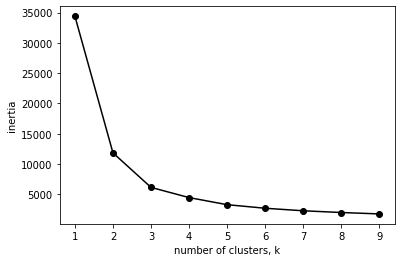

In [77]:
k_values = range(1, 10)
inertias = []

for k in k_values:
    
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(tsne_features.iloc[:, :3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot the values
plt.plot(k_values, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(k_values)
plt.show()

In [84]:
# Picked three based on the above values
km = KMeans(n_clusters=3).fit(data_to_fit)

# Create a cluster map dataframe
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data_no_berlin.index.values
cluster_map['cluster'] = km.labels_

data_no_berlin = cluster_map.merge(data_no_berlin, left_on='data_index', right_index=True)

In [85]:
# Check the cluster kreis 
cluster1 = data_no_berlin[data_no_berlin['cluster'] == 0]
print("Number of counties:", cluster1.shape[0])
list(cluster1['kreis'])

Number of counties: 330


['Flensburg, Stadt',
 'Kiel, Landeshauptstadt',
 'Neumünster, Stadt',
 'Regionalverband Saarbrücken',
 'Landkreis Merzig-Wadern',
 'Landkreis Neunkirchen',
 'Landkreis Saarlouis',
 'Saarpfalz-Kreis',
 'Landkreis St. Wendel',
 'Herzogtum Lauenburg',
 'Pinneberg',
 'Plön',
 'Schleswig-Flensburg',
 'Segeberg',
 'Steinburg',
 'Stormarn',
 'Brandenburg an der Havel',
 'Cottbus',
 'Frankfurt (Oder)',
 'Potsdam',
 'Barnim',
 'Elbe-Elster',
 'Havelland',
 'Märkisch-Oderland',
 'Oberhavel',
 'Oberspreewald-Lausitz',
 'Oder-Spree',
 'Ostprignitz-Ruppin',
 'Potsdam-Mittelmark',
 'Prignitz',
 'Spree-Neiße',
 'Teltow-Fläming',
 'Uckermark',
 'Schwerin, Landeshauptstadt',
 'Ludwigslust-Parchim',
 'Chemnitz',
 'Mittelsachsen',
 'Vogtlandkreis',
 'Zwickau',
 'Bautzen',
 'Görlitz',
 'Meißen',
 'Leipzig',
 'Nordsachsen',
 'Dessau-Roßlau',
 'Halle (Saale)',
 'Magdeburg',
 'Altmarkkreis Salzwedel',
 'Anhalt-Bitterfeld',
 'Börde',
 'Burgenlandkreis',
 'Jerichower Land',
 'Mansfeld-Südharz',
 'Saalekreis',


In [86]:
# Check the cluster kreis 
cluster2 = data_no_berlin[data_no_berlin['cluster'] == 1]
print("Number of counties:", cluster2.shape[0])
list(cluster2['kreis'])

Number of counties: 8


['Nordfriesland',
 'Ostholstein',
 'Vorpommern-Rügen',
 'Vorpommern-Greifswald',
 'Düsseldorf',
 'Köln',
 'Kreisfreie Stadt Frankfurt am Main',
 'Oberallgäu']

In [87]:
# Check the cluster kreis 
cluster3 = data_no_berlin[data_no_berlin['cluster'] == 2]
print("Number of counties:", cluster3.shape[0])
list(cluster3['kreis'])

Number of counties: 60


['Lübeck, Hansestadt',
 'Dithmarschen',
 'Rendsburg-Eckernförde',
 'Dahme-Spreewald',
 'Rostock, Hansestadt',
 'Mecklenburgische Seenplatte',
 'Landkreis Rostock',
 'Nordwestmecklenburg',
 'Erzgebirgskreis',
 'Dresden',
 'Sächsische Schweiz-Osterzgebirge',
 'Leipzig',
 'Harz',
 'Goslar',
 'Göttingen',
 'Hannover',
 'Cuxhaven',
 'Heidekreis',
 'Aurich',
 'Emsland',
 'Friesland',
 'Leer',
 'Osnabrück',
 'Wittmund',
 'Bremen',
 'Essen',
 'Bonn',
 'Aachen',
 'Lippe',
 'Hochsauerlandkreis',
 'Soest',
 'Fulda',
 'Waldeck-Frankenberg',
 'Cochem-Zell',
 'Bernkastel-Wittlich',
 'Stuttgart',
 'Esslingen',
 'Heidelberg',
 'Rhein-Neckar-Kreis',
 'Freudenstadt',
 'Freiburg im Breisgau',
 'Breisgau-Hochschwarzwald',
 'Ortenaukreis',
 'Schwarzwald-Baar-Kreis',
 'Konstanz',
 'Bodenseekreis',
 'Ravensburg',
 'Berchtesgadener Land',
 'Garmisch-Partenkirchen',
 'Miesbach',
 'München',
 'Rosenheim',
 'Traunstein',
 'Passau',
 'Regen',
 'Cham',
 'Nürnberg',
 'Bad Kissingen',
 'Lindau (Bodensee)',
 'Ostallg

In [39]:
clusters = [{'01060',
  '01062',
  '02000',
  '03241',
  '03251',
  '03355',
  '03359',
  '05111',
  '05114',
  '05117',
  '05124',
  '05158',
  '05162',
  '05314',
  '05315',
  '05366',
  '05378',
  '05382',
  '05513',
  '05913',
  '05954',
  '05966',
  '05970',
  '06412',
  '06433',
  '06436',
  '06438',
  '07319',
  '07337',
  '07338',
  '07339',
  '08111',
  '08115',
  '08116',
  '08117',
  '08118',
  '08119',
  '08121',
  '08125',
  '08127',
  '08136',
  '08212',
  '08215',
  '08216',
  '08226',
  '08231',
  '08236',
  '08237',
  '08311',
  '08315',
  '08326',
  '08335',
  '08336',
  '08337',
  '08415',
  '08417',
  '08421',
  '08425',
  '08437',
  '09161',
  '09162',
  '09179',
  '09184',
  '09188',
  '09362',
  '09671',
  '09761',
  '09763',
  '11000',
  '14713',
  '16063'},
 {'08317', '09174', '09175', '09177', '09178', '09181', '09572', '09773'},
 {'05170', '05978', '09564'},
 {'06631', '07138', '16067'},
 {'01004', '01056'},
 {'01054', '01055'},
 {'03459', '05974'},
 {'07333', '09176'},
 {'09272', '09276'},
 {'15002', '16051'}]

In [55]:
for c in clusters:
    c = list(c)
    c = [int(i) for i in c]
    counties = data[data['ags5'].isin(c)]
    print(list(counties['kreis']))

['Segeberg', 'Stormarn', 'Berlin', 'Leipzig', 'Wartburgkreis', 'Hamburg', 'Hannover', 'Diepholz', 'Lüneburg', 'Stade', 'Düsseldorf', 'Krefeld', 'Mülheim an der Ruhr', 'Wuppertal', 'Mettmann', 'Rhein-Kreis Neuss', 'Bonn', 'Köln', 'Euskirchen', 'Rheinisch-Bergischer Kreis', 'Rhein-Sieg-Kreis', 'Gelsenkirchen', 'Dortmund', 'Ennepe-Ruhr-Kreis', 'Olpe', 'Siegen-Wittgenstein', 'Kreisfreie Stadt Frankfurt am Main', 'Groß-Gerau', 'Main-Taunus', 'Offenbach', 'Stadt Worms', 'Südliche Weinstraße', 'Rhein-Pfalz-Kreis', 'Mainz-Bingen', 'Stuttgart', 'Böblingen', 'Esslingen', 'Göppingen', 'Ludwigsburg', 'Rems-Murr-Kreis', 'Heilbronn', 'Heilbronn', 'Schwäbisch Hall', 'Ostalbkreis', 'Karlsruhe', 'Karlsruhe', 'Rastatt', 'Rhein-Neckar-Kreis', 'Pforzheim', 'Enzkreis', 'Freudenstadt', 'Freiburg im Breisgau', 'Breisgau-Hochschwarzwald', 'Schwarzwald-Baar-Kreis', 'Konstanz', 'Lörrach', 'Waldshut', 'Reutlingen', 'Zollernalbkreis', 'Ulm', 'Alb-Donau-Kreis', 'Sigmaringen', 'Ingolstadt', 'München', 'Fürstenfeldb